# SU(3) Phase Transition in the Early Universe

This notebook performs a very simplified simulation of the confining phase transition of a dark SU(3) gauge theory in the early universe.  The confinement scale is $T_c = \Lambda$, which we vary at different points in the notebook.  Otherwise, we typically set $\Lambda = 1\,$TeV.

## Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc_file('matplotlibrc')

import random
from tqdm import tqdm_notebook as tqdm

In [2]:
# Define Constants and Functions #

# Measure everything in units of Tc
Tc    = 1
L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
rho = np.pi**2/30*106.75 * Tc**4

# The only other scale is Mpl, so it is  
# the only quantity that changes with Tc. 
# e.g. if Tc = 10 TeV, Mpl =  1.220910e15/np.sqrt(8*np.pi/3)

# Define Mpl = (G 8 pi /3)^-1/2
Mpl   = 1.220910e16/np.sqrt(8*np.pi/3)
H    = np.sqrt(rho)/Mpl
dt   = 1e-6/H;

def Gamma(T,A=1):
    return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

def Rc(T):
    return 2*mu/L*Tc/(Tc-T)

def vslow(R,T,Tc=None):
    v_term = (1-T/Tc)
    return v_term * np.sign(R-Rc(T))

In [4]:
# First Half of the Phase Transition: Bubble Expansion #
T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
vglob = np.array([0])

k=0
times = np.array([0])

print('t*H, x, Gamma dt')
while x[k]<0.5:

    # Hubble Cooling
    T = np.append(T, T[k]*(1 - dt*H))

    # Get rid of zero radius bubbles or radii corresponding to zero bubbbles
    mask = (R_bub != 0) & (n_bub != 0)
    R_bub, n_bub = R_bub[mask], n_bub[mask]

    # Expand old bubbles
    for j, R in enumerate(R_bub):
        # Bubbles are allowed to shrink, but they can't have negative radii
        R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

    # Add bubbles at critical radius
    R_bub = np.append(R_bub, Rc(T[k]))
    
    # Add this many bubbles at critical radius, per unit volume
    n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
    # A nice way to speed up the code if you want a smaller dt
#     dndt = Gamma(T[k]) * (1-x[k])
#     if dndt < 1e-46:
#         dndt = 0

    # Keep track of global threshold
    vglob = np.append(vglob, 100*H/(4*np.pi * np.sum(R_bub**2 * n_bub)))

    # Update the Fraction in the Confined Phase
    x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
    
    # Phase conversion results in heating
    T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])
    
    # Output
    if (n_bub[-1]>1e-55):
        interval = 5
    else:
        interval = 100
        
    if((k-1)%interval == 0):
        print('{:.2}'.format(times[-1]*H), ' ', 
              '{:.3}'.format(x[k]), ' ', 
              '{:.3}'.format(n_bub[-1]/dt))

    times = np.append(times, times[-1] + dt)
    k+=1
R0 = np.sum(n_bub*R_bub)/np.sum(n_bub)

t*H, x, Gamma dt
1e-06   0.0   0.0
0.0001   0.0   0.0
0.0002   0.0   0.0
0.0003   1.47e-165   7.44e-190


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


0.0004   1.05e-95   6.67e-122
0.0005   2.31e-57   6.1e-85
0.00059   7.24e-36   1.94e-64
0.0006   6.64e-35   1.58e-63
0.0006   5.81e-34   1.24e-62
0.00061   4.86e-33   9.24e-62
0.00061   3.9e-32   6.62e-61
0.00062   3e-31   4.55e-60
0.00062   2.21e-30   3.01e-59
0.00063   1.57e-29   1.91e-58
0.00063   1.07e-28   1.17e-57
0.00064   7.02e-28   6.89e-57
0.00064   4.45e-27   3.92e-56
0.00065   2.72e-26   2.15e-55
0.00065   1.6e-25   1.14e-54
0.00066   9.15e-25   5.88e-54
0.00066   5.05e-24   2.93e-53
0.00067   2.7e-23   1.41e-52
0.00067   1.4e-22   6.6e-52
0.00068   7.02e-22   3e-51
0.00068   3.42e-21   1.32e-50
0.00069   1.62e-20   5.67e-50
0.00069   7.47e-20   2.37e-49
0.0007   3.35e-19   9.61e-49
0.0007   1.46e-18   3.8e-48
0.00071   6.2e-18   1.47e-47
0.00071   2.57e-17   5.52e-47
0.00072   1.04e-16   2.03e-46
0.00072   4.09e-16   7.27e-46
0.00073   1.57e-15   2.55e-45
0.00073   5.92e-15   8.73e-45
0.00074   2.17e-14   2.93e-44
0.00074   7.82e-14   9.59e-44
0.00075   2.75e-13   3.08e-43

In [5]:
# Second Half of the Phase Transition: Pocket Contraction #
T2     = np.array([T[-1]])
x2     = np.array([0.5])

R1 = 10**(-8/3) * (Mpl/Tc)**(2/3)
n_pocket = 3/(8*np.pi * R1**3)
R2 = np.array([R1])
times2 = np.array([0])

k=0
while R2[-1]>0:

    T2 = np.append(T2, T2[k]*(1 - dt*H))

    x2 = np.append(x2, 1-4*np.pi*R2[-1]**3/3 * n_pocket)
    R2 = np.append(R2, R2[-1] - (1-T2[k])*dt)

    # Injected heat
    T2[k+1] += L/(4*rho/Tc) * (x2[k+1] - x2[k])

    times2 = np.append(times2, times2[-1] + dt)
    k+=1

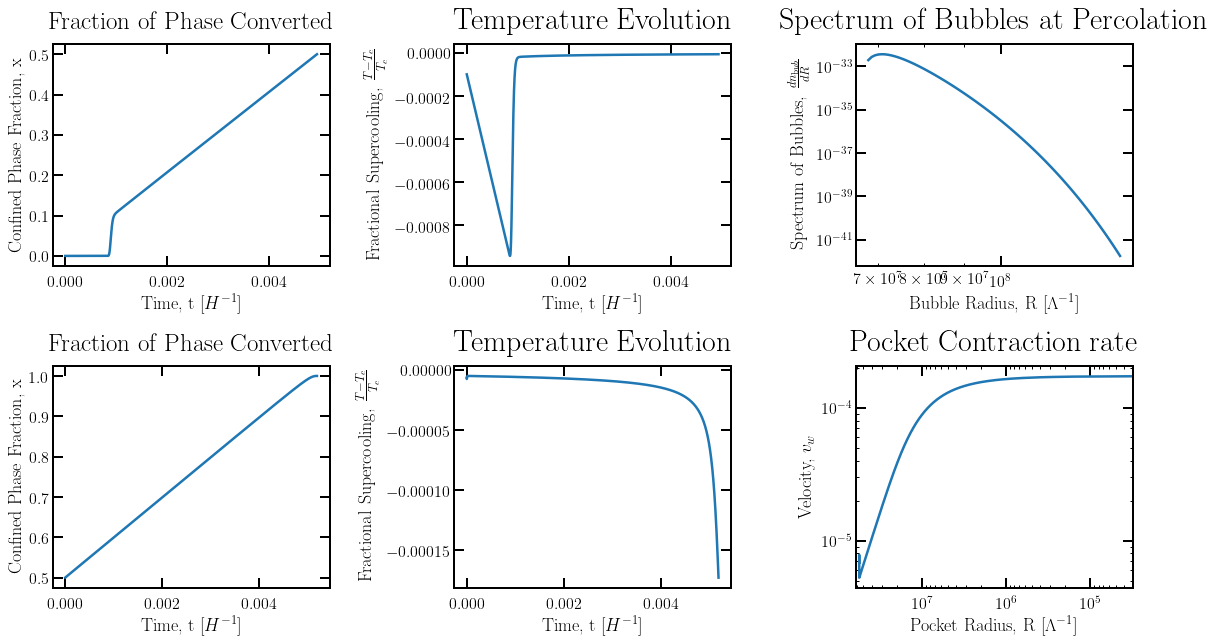

In [33]:
# Generate Plots for Paper #

fig, axarr = plt.subplots(2, 3, figsize=(15,10))

axarr[0][0].plot(times*H, x)
axarr[0][0].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[0][0].set_ylabel('Confined Phase Fraction, x', fontsize=18)
axarr[0][0].set_title('Fraction of Phase Converted', fontsize=25)

axarr[0][1].plot(times*H, T/Tc-1)
axarr[0][1].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[0][1].set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=18)
axarr[0][1].set_title('Temperature Evolution', fontsize=30)

mask = (n_bub >= np.max(n_bub)*1e-10) & (R_bub != 0)
a = np.transpose([R_bub[mask],n_bub[mask]])
data = a[a[:,0].argsort()]
dndR = np.abs(np.diff(data[:,1])/np.diff(data[:,0]))

axarr[0][2].plot(data[:-1,0] * Tc, dndR / Tc**2)
axarr[0][2].loglog()
axarr[0][2].set_xlabel(r'Bubble Radius, R [$\Lambda^{-1}$]', fontsize=18)
axarr[0][2].set_ylabel(r'Spectrum of Bubbles, $\frac{dn_{\mathrm bub}}{dR}$', fontsize=18)
axarr[0][2].set_title('Spectrum of Bubbles at Percolation', fontsize=30)

axarr[1][0].plot(times2*H, x2)
axarr[1][0].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[1][0].set_ylabel('Confined Phase Fraction, x', fontsize=18)
axarr[1][0].set_title('Fraction of Phase Converted', fontsize=25)


axarr[1][1].plot(times2*H, T2/Tc-1)
axarr[1][1].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[1][1].set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=18)
axarr[1][1].set_title('Temperature Evolution', fontsize=30)

axarr[1][2].set_xlim([R2[0]*1.1, R2[-2]*.99])
axarr[1][2].plot(R2, 1-T2/Tc)#, label='0.5')
axarr[1][2].loglog()
axarr[1][2].set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=18)
axarr[1][2].set_ylabel(r'Velocity, $v_w$', fontsize=18)
axarr[1][2].set_title('Pocket Contraction rate', fontsize=30)

plt.subplots_adjust(wspace=0.45, hspace=0.45, left=-0.0, right=1+0.0)

# plt.subplots_adjust(wspace=0.35, left=-0.0, right=1+0.0)

## First Half of Phase Transition Plots

Text(0.5, 1.0, 'Fraction of Phase Converted')

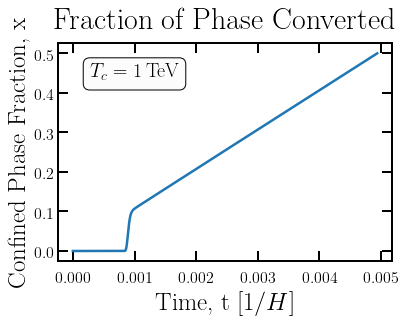

In [9]:
plt.figure()
ax = plt.gca()
ax.plot(times*H, x)

txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(.001, .448, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel('Confined Phase Fraction, x', fontsize=25)
ax.set_title('Fraction of Phase Converted', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/x_vs_t_new3.pdf')

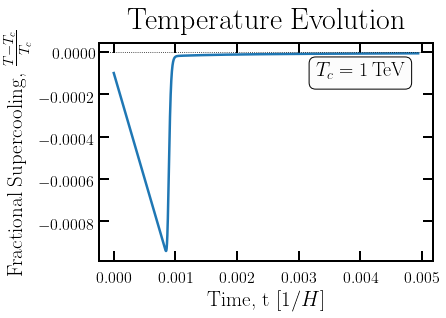

In [12]:
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(times*H, (T/Tc-1))

ax1.set_xlabel(r'Time, t [$1/H$]', fontsize=21)
ax1.set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=21)
ax1.set_title('Temperature Evolution', fontsize=30)


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax=plt.gca()
ax.text(.004, -1e-4, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})


plt.axhline(0, linestyle=':', linewidth=0.8, color='k')

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/T_vs_t_new3.pdf')

Text(0.5, 1.0, 'Spectrum of Bubbles at Percolation')

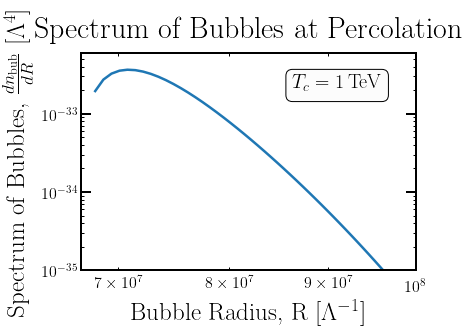

In [29]:
plt.figure()
ax = plt.gca()
ax.loglog()
ax.set_yscale('log')
ax.plot(data[:-1,0], dndR)#, label='0.5')

ax=plt.gca()
ax.text(9.1e7, 2.3e-33, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

plt.axis([6.7e7,1e8,1e-35,6e-33])
ax.set_xlabel(r'Bubble Radius, R [$\Lambda^{-1}$]', fontsize=25)
ax.set_ylabel(r'Spectrum of Bubbles, $\frac{dn_{\mathrm{bub}}}{dR}$ [$\Lambda^4$]', fontsize=25)
ax.set_title('Spectrum of Bubbles at Percolation', fontsize=30)
# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/spec_new3.pdf')

## Second Half of Phase Transition Plots

Text(0.5, 1.0, 'Fraction of Phase Converted')

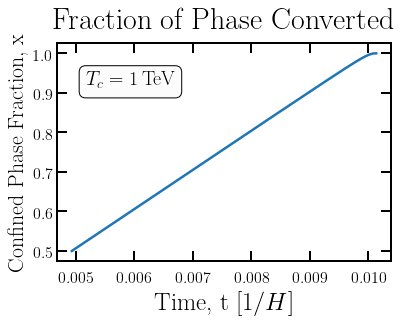

In [34]:
plt.figure()
ax = plt.gca()
ax.plot((times[-1]+times2)*H, x2)


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(times[-1]*H+.001, .428+0.5, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel('Confined Phase Fraction, x', fontsize=22)
ax.set_title('Fraction of Phase Converted', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/x_vs_t_pt2.pdf')

Text(0.5, 1.0, 'Temperature Evolution')

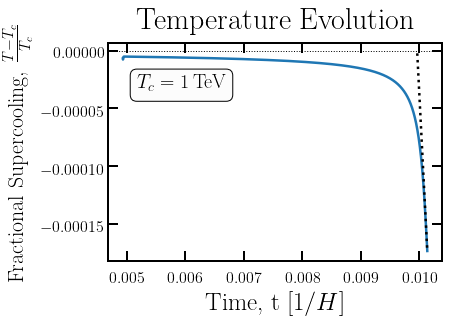

In [36]:
ind=0

# Does the end of the Simulation return to Hubble cooling?
sz = len(times)
tms = times2[-172:]
temp = np.array([(T2-1)[-1] + (times2[-1]-tm)*H for tm in tms])

plt.figure()
ax = plt.gca()
ax.plot((times[-1]+times2[ind:])*H, (T2-1)[ind:])
ax.plot((times[-1]+tms[ind:])*H,temp[ind:], color='k', linestyle=':', label='Hubble Slope')


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(times[-1]*H+.001, -3e-5, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})


plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=22)
ax.set_title('Temperature Evolution', fontsize=30)
# leg = ax.legend(fontsize=20, loc=2)
# leg.set_title(txt)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/T_vs_t_pt2.pdf')

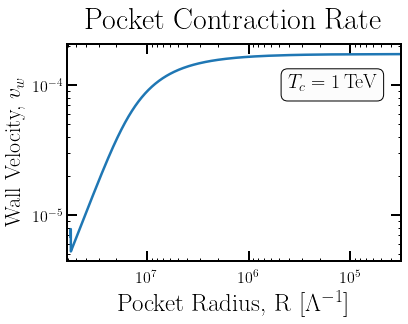

In [51]:
plt.figure()
ax = plt.gca()
ax.plot(R2, 1-T2/Tc)

ax.loglog()
ax.set_xlim([R2[0]*1.1, R2[-2]*.99])
txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(1.5e5, 1e-4, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title('Pocket Contraction Rate', fontsize=30)

plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/vw_vs_R.pdf')

Calculating the Global Threshold (i.e. the velocity threshold past which pockets/bubbles produce a net heating of the plasma):

All pockets are of radius $R$
$$
\begin{alignat}{1}
1-x &= \frac{4 \pi}3 R^3 n_\text{pocket}  \\
4\pi R^2 n_\text{pocket} v_w &= 100 H \\ 
v_w &= \frac{200 R_0^2}{3 R^2} (H \, R_0)
\end{alignat}
$$

In the first half there are $n_i$ bubbles of radius $R_i$
$$
\begin{alignat}{1}
x &= \frac{4 \pi}3 R_i^3 n_i  \\
4\pi R_i^2 n_i v_w &= 100 H \\ 
v_w &= \frac{200 H}{3 R_i^2 n_i}
\end{alignat}
$$

[None, None]

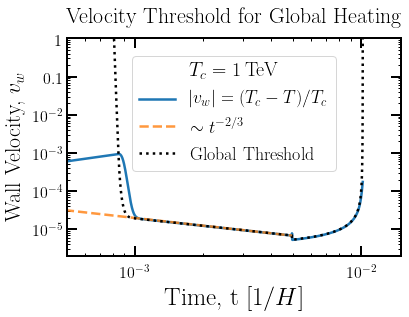

In [48]:
ind = 795

plt.figure()
ax = plt.gca()
ax.loglog()
ax.plot(np.append(times,(times[-1]+times2))*H, np.append(1-T,1-T2), 
        label=r'$\left| v_w \right| = (T_c-T)/T_c$')

# t^-2/3 scaling during the Maxwell Construction regime?
ax.plot(times[100:]*H, 
        times[100:]**(-2/3) * (1-T[-200])/times[-200]**(-2/3),
       alpha=.8, linestyle='--', label=r'$\sim t^{-2/3}$')

tmpv = np.append(vglob[ind:], 200/3*(R1/R2)**2 * H*R1)
ax.plot(np.append(times[ind:],(times[-1]+times2))*H, tmpv, 
        label='Global Threshold', linestyle=':', color='k')

ax.set_ylim([2e-6,1])
ax.set_xlim([5e-4,1.5e-2])
plt.axhline(0, color='k', linestyle='--', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title(r'Velocity Threshold for Global Heating', fontsize=22)


leg = ax.legend(loc=9, title=r'$T_c = 1 \, \mathrm{TeV}$', fontsize=18)
plt.setp(leg.get_title(), fontsize=20)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/glob_thresh1.pdf')

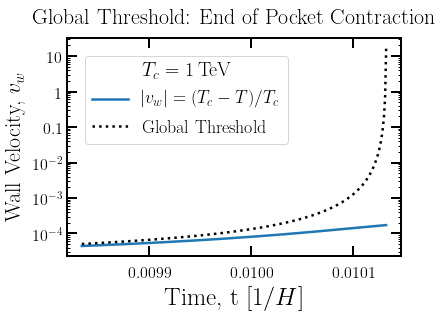

In [47]:
ind=300
plt.figure()
ax = plt.gca()
# ax.loglog()
ax.set_yscale('log')
ax.plot((times[-1]+times2[-ind:-1])*H, 1-T2[-ind:-1], 
        label=r'$\left| v_w \right| = (T_c-T)/T_c$')

ax.plot((times[-1]+times2[-ind:-1])*H, 200/3*(R1/R2[-ind:-1])**2 * H*R1, 
        label='Global Threshold', linestyle=':', color='k')


plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title('Global Threshold: End of Pocket Contraction', fontsize=22)

leg = ax.legend(fontsize=18, title=r'$T_c = 1 \, \mathrm{TeV}$')
plt.setp(leg.get_title(), fontsize=20)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/glob_thresh2.pdf')

## Generate R$_0$ vs. $\Lambda$

In [19]:
# Measure everything in units of Tc #
# Larger Tc means smaller Mpl #
Tc    = 1
Lams    = 10**np.arange(0,6,.5)
R0_list = np.zeros_like(Lams)
for ii,Lam in enumerate(tqdm(Lams)):
    Mpl   = 1.220910e16/np.sqrt(8*np.pi/3)/Lam

    L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
    rho = np.pi**2/30*106.75 * Tc**4
    H    = np.sqrt(rho)/Mpl
    dt   = 1e-6/H;

    def Gamma(T,A=1):
        return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

    def Rc(T):
        return 2*mu/L*Tc/(Tc-T)

    def vslow(R,T,Tc=None):
        v_term = (1-T/Tc)
        return v_term * np.sign(R-Rc(T))

    T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
    k=0
    times = np.array([0])
    while x[k]<0.5:

        T = np.append(T, T[k]*(1 - dt*H))

        mask = (R_bub != 0) & (n_bub != 0)
        R_bub, n_bub = R_bub[mask], n_bub[mask]

        for j, R in enumerate(R_bub):
            R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

        R_bub = np.append(R_bub, Rc(T[k]))
        n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
        x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
        T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])

        times = np.append(times, times[-1] + dt)
        k+=1

    R0_list[ii] = np.sum(n_bub*R_bub)/np.sum(n_bub)

In [ ]:
# Find a linear fit to the log-log plot
from scipy.optimize import curve_fit

def f(x, A, B):
    return A*x + B

popt, pcov = curve_fit(f, np.log10(Lams), np.log10(R0_list))
popt

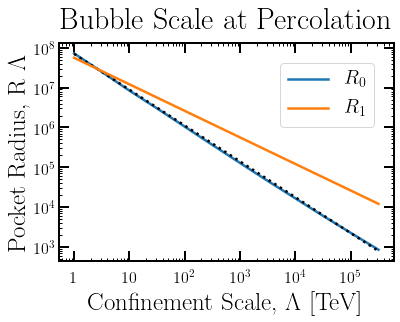

In [366]:
# Reduced Planck Mass
Mpl_red = 1.220910e16/np.sqrt(8*np.pi)

plt.figure()#figsize=(4,4))
plt.loglog()
plt.plot(Lams, R0_list, label='$R_0$')
# plt.plot(Lams,6.7e7*Lams**(-.9), linestyle=':', color='k')
plt.plot(Lams,1e-6*(Lams/Mpl_red)**(-.9), linestyle=':', color='k')
Mpl = 1.220910e16/np.sqrt(8*np.pi/3)
plt.plot(Lams,  10**(-8/3) * (Mpl/Lams)**(2/3), label=r'$R_1$')
plt.xlabel(r'Confinement Scale, $\Lambda$ [TeV]', fontsize=25)
plt.ylabel(r'Pocket Radius, R $\Lambda$', fontsize=25)
plt.title(r'Bubble Scale at Percolation', fontsize=30)

plt.legend(fontsize=20)

## $v_w$ vs. $\Lambda$

In [53]:
# Measure everything in units of Tc #
# Larger Tc means smaller Mpl #
Tc    = 1
Lams    = 10**np.arange(0,6,1.0)
R0_list = np.zeros_like(Lams)
vs = [None for l in Lams]
for ii,Lam in enumerate(tqdm(Lams)):
    Mpl   = 1.220910e16/np.sqrt(8*np.pi/3)/Lam

    L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
    rho = np.pi**2/30*106.75 * Tc**4
    H    = np.sqrt(rho)/Mpl
    dt   = 1e-6/H;

    def Gamma(T,A=1):
        return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

    def Rc(T):
        return 2*mu/L*Tc/(Tc-T)

    def vslow(R,T,Tc=None):
        v_term = (1-T/Tc)
        return v_term * np.sign(R-Rc(T))

    T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
    k=0
    times = np.array([0])
    while x[k]<0.5:

        T = np.append(T, T[k]*(1 - dt*H))

        mask = (R_bub != 0) & (n_bub != 0)
        R_bub, n_bub = R_bub[mask], n_bub[mask]

        for j, R in enumerate(R_bub):
            R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

        R_bub = np.append(R_bub, Rc(T[k]))
        n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
        x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
        T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])

        times = np.append(times, times[-1] + dt)
        k+=1
    R0_list[ii] = np.sum(n_bub*R_bub)/np.sum(n_bub)
        
    # Initialization #
    T2     = np.array([T[-1]])
    x2     = np.array([0.5])

    R1 = 10**(-8/3) * Mpl**(2/3)
    n_pocket = 3/(8*np.pi * R1**3)
    R2 = np.array([R1])
    times2 = np.array([0])

    k=0
    while R2[-1]>0:

        T2 = np.append(T2, T2[k]*(1 - dt*H))

        x2 = np.append(x2, 1-4*np.pi*R2[-1]**3/3 * n_pocket)
        R2 = np.append(R2, R2[-1] - (1-T2[k])*dt)

        # Injected heat
        T2[k+1] += L/(4*rho/Tc) * (x2[k+1] - x2[k])

        times2 = np.append(times2, times2[-1] + dt)
        k+=1
        
    vs[ii] = np.transpose([R2, 1-T2])
    
v_asymp = np.array([vs[ii][-1,1] for ii in np.arange(len(vs))])

Text(0.5, 1.0, 'Pocket Contraction rate')

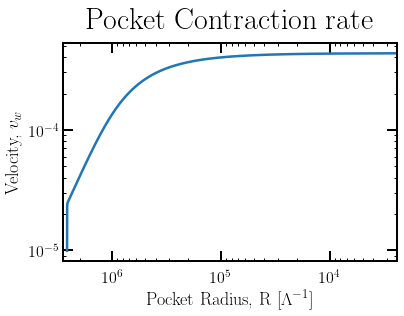

In [65]:
# vary over ii to see if the individual velocity plots make sense #
ii=2
plt.figure()
ax = plt.gca()
ax.loglog()

ax.set_xlim([vs[ii][0,0]*1.1, vs[ii][-2,0]*.99])
ax.plot(vs[ii][:,0], vs[ii][:,1])#, label='0.5')
ax.set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=18)
ax.set_ylabel(r'Velocity, $v_w$', fontsize=18)
ax.set_title('Pocket Contraction rate', fontsize=30)

In [57]:
# Linear Fit
from scipy.optimize import curve_fit

def f(x, A, B):
    return A*x + B

popt, pcov = curve_fit(f, np.log10(Lams), np.log10(v_asymp))
print(popt)

[ 0.19967299 -3.76118052]


Text(0.5, 1.0, 'Pocket Contraction Rate')

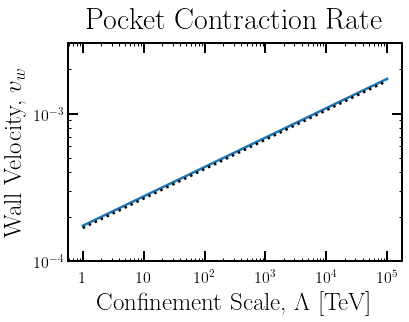

In [59]:
# Reduced Planck Mass
Mpl_red = 1.220910e16/np.sqrt(8*np.pi)

plt.figure()
ax = plt.gca()
ax.loglog()

ax.plot(Lams, v_asymp)
ax.set_ylim([1e-4, 3e-3])
ax.plot(Lams, 0.2*(Lams/Mpl_red)**(.2), linestyle=':', color='k', label='fit')#, label='0.5')
ax.set_xlabel(r'Confinement Scale, $\Lambda$ [TeV]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=25)
ax.set_title('Pocket Contraction Rate', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/vw_vs_lam.pdf')